<a href="https://colab.research.google.com/github/rafawaltrick/Pandas/blob/main/prototipo_amazonia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install folium


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 53.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import datetime as dt
import geopandas as gpd
import folium
from shapely.geometry import Polygon, Point, LineString
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 8))

In [ ]:
dados_br = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/brasil/BR_Pais_2021.shp'
dados_amazonia_bioma = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/bioma amazonico/amazon_biome_border.shp'
dados_uc_am = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/bioma amazonico/conservation_units_amazon_biome.shp'
dados_ti_am = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/bioma amazonico/indigenous_area_amazon_biome.shp'

In [ ]:
focos20 = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2020/focos_20.csv'
focos20_shp = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2020/Focos_2020-01-01_2020-12-31.shp'
focosUC20 = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2020/focos_UC_20.csv'
focosTI20 = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2020/focos_TI_20.csv'
focosUC20_shp = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2020/focos_UC_20.shp'
focosTI20_shp = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2020/focos_TI_20.shp'

In [ ]:
focos21 = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2021/focos-21.csv'
focosUC21 = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2021/focos-UC-21.csv'
focosTI21 = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2021/focos-TI-21.csv'

In [ ]:
focos22 = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2022/focos-22.csv'
focosUC22 = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2022/focos-UC-2022.csv'
focosTI22 = '/content/drive/MyDrive/Colab Notebooks/dados prot_amazonas/dados/focos 2022/focos-TI-2022.csv'

In [ ]:
df_ti20 = pd.read_csv(focosTI20)
df_focos20 = pd.read_csv(focos20)
df_uc20 = pd.read_csv(focosUC20)
dfg_focos20 =gpd.read_file(focos20_shp)
dfg_uc20 = gpd.read_file(focosUC20_shp)
dfg_ti20 = gpd.read_file(focosTI20_shp)

In [ ]:
df_ti21 = pd.read_csv(focosTI21)
df_focos21 = pd.read_csv(focos21)
df_uc21 = pd.read_csv(focosUC21)

In [ ]:
df_ti22 = pd.read_csv(focosTI22)
df_focos22 = pd.read_csv(focos22)
df_uc22 = pd.read_csv(focosUC22)

In [ ]:
dfg_br = gpd.read_file(dados_br)
dfg_uc_am = gpd.read_file(dados_uc_am)
dgf_ti_am = gpd.read_file(dados_ti_am)
dfg_am_bioma = gpd.read_file(dados_amazonia_bioma)

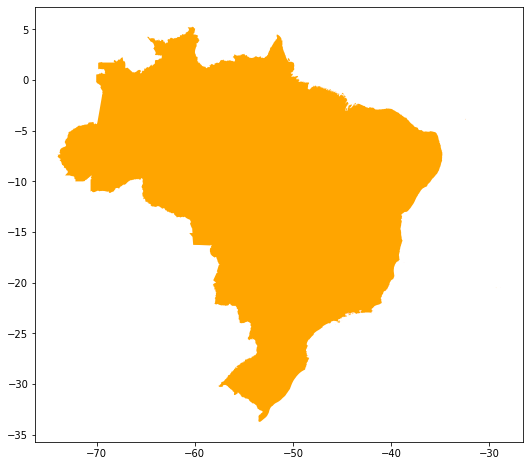

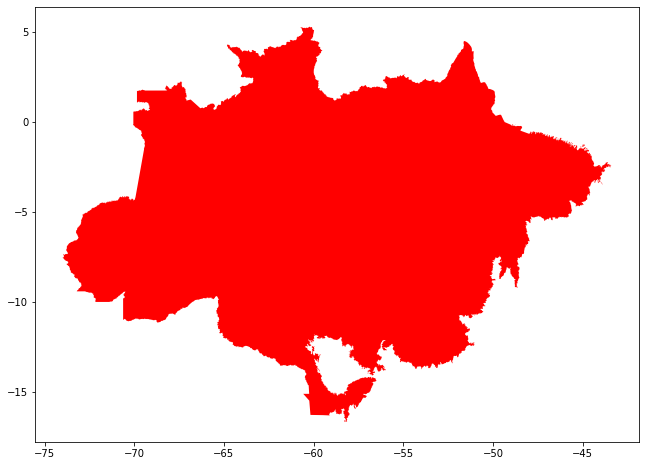

In [ ]:
dfg_br.plot(color = 'orange')
dfg_am_bioma.plot(color = 'red')

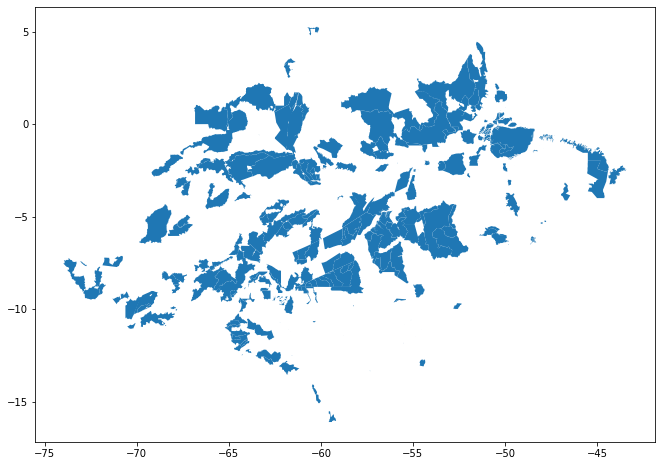

In [ ]:
dfg_uc_am.plot()

In [ ]:
dfg_focos20.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
dgf_ti_am.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
type(dfg_focos20)

geopandas.geodataframe.GeoDataFrame

In [ ]:
type(dfg_uc_am)

geopandas.geodataframe.GeoDataFrame

In [ ]:
dfg_focos20.columns

Index(['datahora', 'satelite', 'pais', 'estado', 'municipio', 'bioma',
       'diasemchuv', 'precipitac', 'riscofogo', 'latitude', 'longitude', 'frp',
       'geometry'],
      dtype='object')

In [ ]:
dgf_ti_am.columns

Index(['id', 'terrai_cod', 'terrai_nom', 'etnia_nome', 'fase_ti', 'geometry'], dtype='object')

In [ ]:
dfg_focos20[['latitude', 'longitude']]

latitude  longitude
0        -5.17175 -46.106270
1       -13.25690 -57.186699
2       -13.25880 -57.194801
3       -12.71650 -55.233101
4       -11.68550 -54.486599
...           ...        ...
2334458 -12.04974 -54.017370
2334459  -3.55045 -51.569780
2334460  -1.87000 -54.850000
2334461  -1.10000 -47.470000
2334462  -3.69340 -54.655280

[2334463 rows x 2 columns]

In [ ]:
dfg_focos20['geometry']

0           POINT (-46.10627 -5.17175)
1          POINT (-57.18670 -13.25690)
2          POINT (-57.19480 -13.25880)
3          POINT (-55.23310 -12.71650)
4          POINT (-54.48660 -11.68550)
                      ...             
2334458    POINT (-54.01737 -12.04974)
2334459     POINT (-51.56978 -3.55045)
2334460     POINT (-54.85000 -1.87000)
2334461     POINT (-47.47000 -1.10000)
2334462     POINT (-54.65528 -3.69340)
Name: geometry, Length: 2334463, dtype: geometry

In [ ]:
type(dfg_focos20)

geopandas.geodataframe.GeoDataFrame

In [ ]:
dgf_ti_am.terrai_cod.unique

<bound method Series.unique of 0       3401
1      51801
2      21601
3      28802
4       9201
       ...  
327    51101
328    46301
329    44001
330    46101
331    48601
Name: terrai_cod, Length: 332, dtype: int64>

In [ ]:
dfg_focos20['geometry'] = None

for index, row in dfg_focos20.iterrows():
  dfg_focos20.loc[index, 'geometry'] = Point(row.longitude, row.latitude)

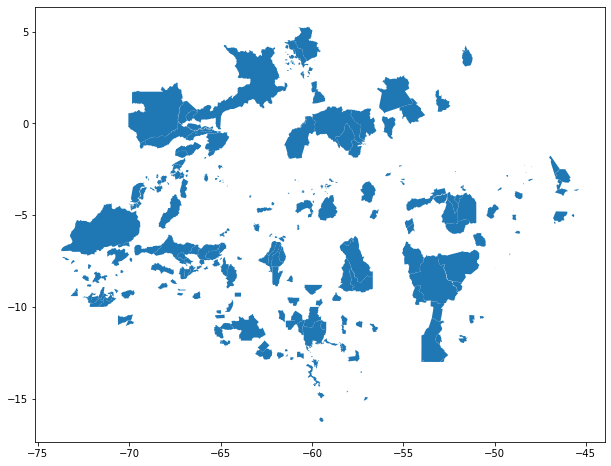

In [ ]:
dgf_ti_am.plot()

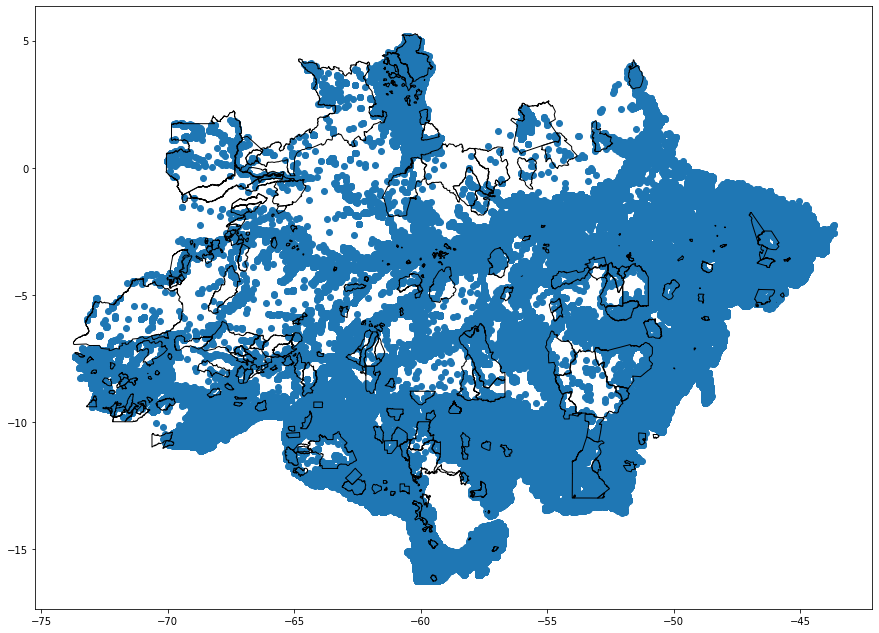

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))

dfg_focos20.plot(ax = ax)
dgf_ti_am.plot(ax = ax, facecolor = 'None', edgecolor = 'black')

In [ ]:
polygon_ti = dgf_ti_am.iloc[0:].geometry

type(polygon_ti)

geopandas.geoseries.GeoSeries

In [ ]:
focos_ti_20 = dfg_focos20.set_crs('EPSG:4326')[dfg_focos20.intersects(polygon_ti.to_crs('EPSG:4326'))]

#Não consegui resolver esse problema. Não está ocorrendo a intersecção.

/usr/local/lib/python3.8/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


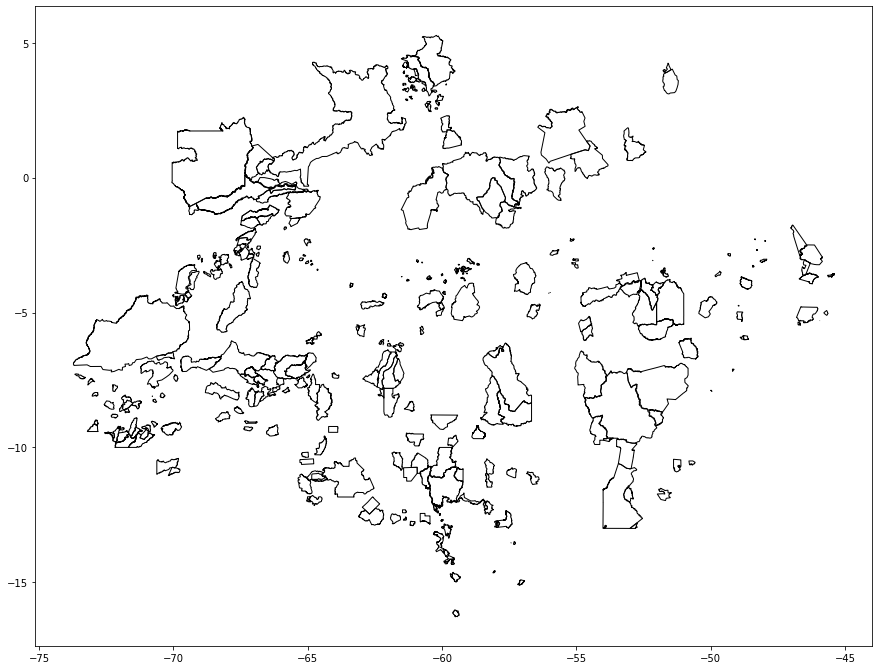

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))

focos_ti_20.plot(ax = ax)
dgf_ti_am.plot(ax = ax, facecolor = 'None', edgecolor = 'black')

# Só está retornando os poligonos sem os pontos. A intersecção não está sendo retornada.

In [ ]:
#Criando um mapa.
# Primeiro trazemos a gdf(geodataframe) com os dados de fogo.
focos_uc_20 = dfg_uc20.iloc[:300]
#Retornar o zoom do mapa em relação a latitude e longitude dos focos.
media_lat = focos_uc_20['latitude'].mean()
media_lon = focos_uc_20['longitude'].mean()
#Trazemos o mapa com o parametro de localização das médias lat e lon.
mapa = folium.Map(location = [media_lat, media_lon])
#Inserir os dados no mapa.
mapa_uc20 = folium.features.GeoJson(focos_uc_20) 
#Adicionar os dados no mapa.
mapa.add_child(mapa_uc20)

mapa

In [ ]:
# Para mostrar todos os dados do mapa e facilitar na visualização e renderização dos dados, vou utilizar um plugin do folium.
from folium.plugins import FastMarkerCluster

In [ ]:
#Trazemos o mapa com o parametro de localização das médias lat e lon.
mapa = folium.Map(location = [media_lat, media_lon])
#Inserir os dados no mapa mas utilizando o plugin.
mc = FastMarkerCluster(dfg_uc20[['latitude', 'longitude']])
#Adicionar os dados no mapa.
mapa.add_child(mc)

mapa